#  Confidence Intervals
Illustrates TVirtualFitter::GetConfidenceIntervals
This method computes confidence intervals for the fitted function




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:27 AM.</small></i>

In [1]:
%%cpp -d
#include "TGraphErrors.h"
#include "TGraph2DErrors.h"
#include "TCanvas.h"
#include "TF2.h"
#include "TH1.h"
#include "TVirtualFitter.h"
#include "TRandom.h"

In [2]:
TCanvas *myc = new TCanvas("myc",
   "Confidence intervals on the fitted function",1200, 500);
myc->Divide(3,1);

### 1. A graph
Create and fill a graph

In [3]:
Int_t ngr = 100;
TGraph *gr = new TGraph(ngr);
gr->SetName("GraphNoError");
Double_t x, y;
Int_t i;
for (i=0; i<ngr; i++){
   x = gRandom->Uniform(-1, 1);
   y = -1 + 2*x + gRandom->Gaus(0, 1);
   gr->SetPoint(i, x, y);
}

Create the fitting function

In [4]:
TF1 *fpol = new TF1("fpol", "pol1", -1, 1);
fpol->SetLineWidth(2);
gr->Fit(fpol, "Q");

/*Create a TGraphErrors to hold the confidence intervals*/
TGraphErrors *grint = new TGraphErrors(ngr);
grint->SetTitle("Fitted line with .95 conf. band");
for (i=0; i<ngr; i++)
   grint->SetPoint(i, gr->GetX()[i], 0);
/*Compute the confidence intervals at the x points of the created graph*/
(TVirtualFitter::GetFitter())->GetConfidenceIntervals(grint);

Now the "grint" graph contains function values as its y-coordinates
and confidence intervals as the errors on these coordinates
Draw the graph, the function and the confidence intervals

In [5]:
myc->cd(1);
grint->SetLineColor(kRed);
grint->Draw("ap");
gr->SetMarkerStyle(5);
gr->SetMarkerSize(0.7);
gr->Draw("psame");

### 2. A histogram

In [6]:
myc->cd(2);

Create, fill and fit a histogram

In [7]:
Int_t nh=5000;
TH1D *h = new TH1D("h",
   "Fitted gaussian with .95 conf.band", 100, -3, 3);
h->FillRandom("gaus", nh);
TF1 *f = new TF1("fgaus", "gaus", -3, 3);
f->SetLineWidth(2);
h->Fit(f, "Q");
h->Draw();

/*Create a histogram to hold the confidence intervals*/
TH1D *hint = new TH1D("hint",
   "Fitted gaussian with .95 conf.band", 100, -3, 3);
(TVirtualFitter::GetFitter())->GetConfidenceIntervals(hint);

Now the "hint" histogram has the fitted function values as the
bin contents and the confidence intervals as bin errors

In [8]:
hint->SetStats(kFALSE);
hint->SetFillColor(2);
hint->Draw("e3 same");

### 3. A 2d graph
Create and fill the graph

In [9]:
Int_t ngr2 = 100;
Double_t z, rnd, e=0.3;
TGraph2D *gr2 = new TGraph2D(ngr2);
gr2->SetName("Graph2DNoError");
TF2  *f2 = new TF2("f2",
   "1000*(([0]*sin(x)/x)*([1]*sin(y)/y))+250",-6,6,-6,6);
f2->SetParameters(1,1);
for (i=0; i<ngr2; i++){
   f2->GetRandom2(x,y);
   // Generate a random number in [-e,e]
   rnd = 2*gRandom->Rndm()*e-e;
   z = f2->Eval(x,y)*(1+rnd);
   gr2->SetPoint(i,x,y,z);
}

Create a graph with errors to store the intervals

In [10]:
TGraph2DErrors *grint2 = new TGraph2DErrors(ngr2);
for (i=0; i<ngr2; i++)
   grint2->SetPoint(i, gr2->GetX()[i], gr2->GetY()[i], 0);

Fit the graph

In [11]:
f2->SetParameters(0.5,1.5);
gr2->Fit(f2, "Q");
/*Compute the confidence intervals*/
(TVirtualFitter::GetFitter())->GetConfidenceIntervals(grint2);

Now the "grint2" graph contains function values as z-coordinates
and confidence intervals as their errors
draw

In [12]:
myc->cd(3);
f2->SetNpx(30);
f2->SetNpy(30);
f2->SetFillColor(kBlue);
f2->Draw("surf4");
grint2->SetNpx(20);
grint2->SetNpy(20);
grint2->SetMarkerStyle(24);
grint2->SetMarkerSize(0.7);
grint2->SetMarkerColor(kRed);
grint2->SetLineColor(kRed);
grint2->Draw("E0 same");
grint2->SetTitle("Fitted 2d function with .95 error bars");

myc->cd();

Draw all canvases 

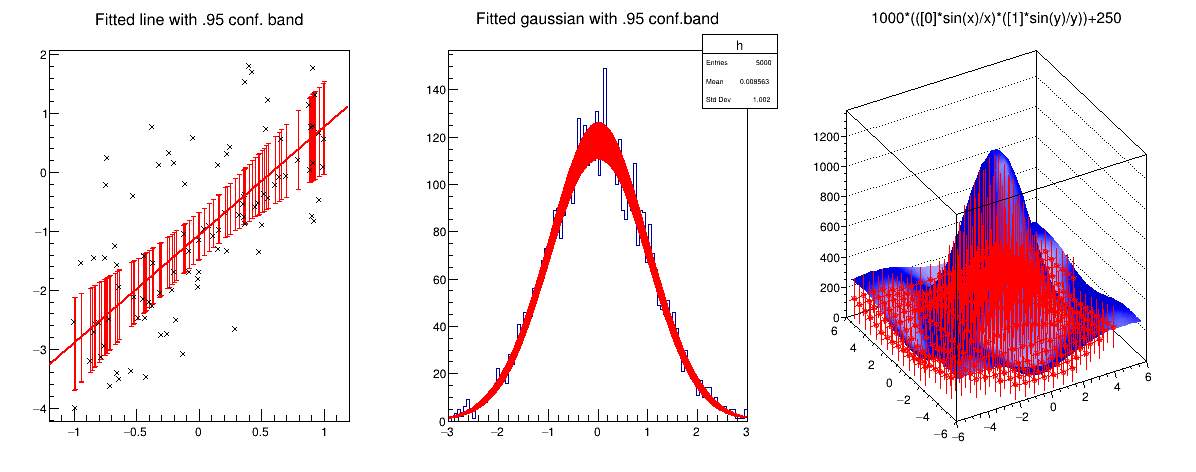

In [13]:
gROOT->GetListOfCanvases()->Draw()